In [499]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
import matplotlib.pyplot as plt


In [500]:
#Here we read the Titanic.csv file and for the features that have some values missing, we fill in the average values
#using the average of the same feature of other samples.

In [501]:
df = pd.read_csv('Titanic.csv')
df = df[['pclass', 'sex', 'age','sibsp','survived']] 
df['pclass'] = df['pclass'].map({'1st':1,'2nd':2,'3rd':3})
df['sex'] = df['sex'].map({'male':0,'female':1})
df['age'].fillna((df['age'].mean()),inplace=True)
df = df.dropna()
df.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [502]:
#Here we randomly split the dataset into 80% training set and 20% test set

In [503]:
X = df.drop('survived',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [504]:
#Here we fit a decision tree model using survived as the dependent variable.

In [505]:
dt = DecisionTreeClassifier(random_state = 3)

dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test, y_pred))

print("Accuracy: ",accuracy_score(y_test, y_pred))


Classification Report: 

               precision    recall  f1-score   support

           0       0.73      0.78      0.75       155
           1       0.65      0.58      0.61       107

    accuracy                           0.70       262
   macro avg       0.69      0.68      0.68       262
weighted avg       0.69      0.70      0.70       262

Accuracy:  0.6984732824427481


In [506]:
#Here we plot the full tree

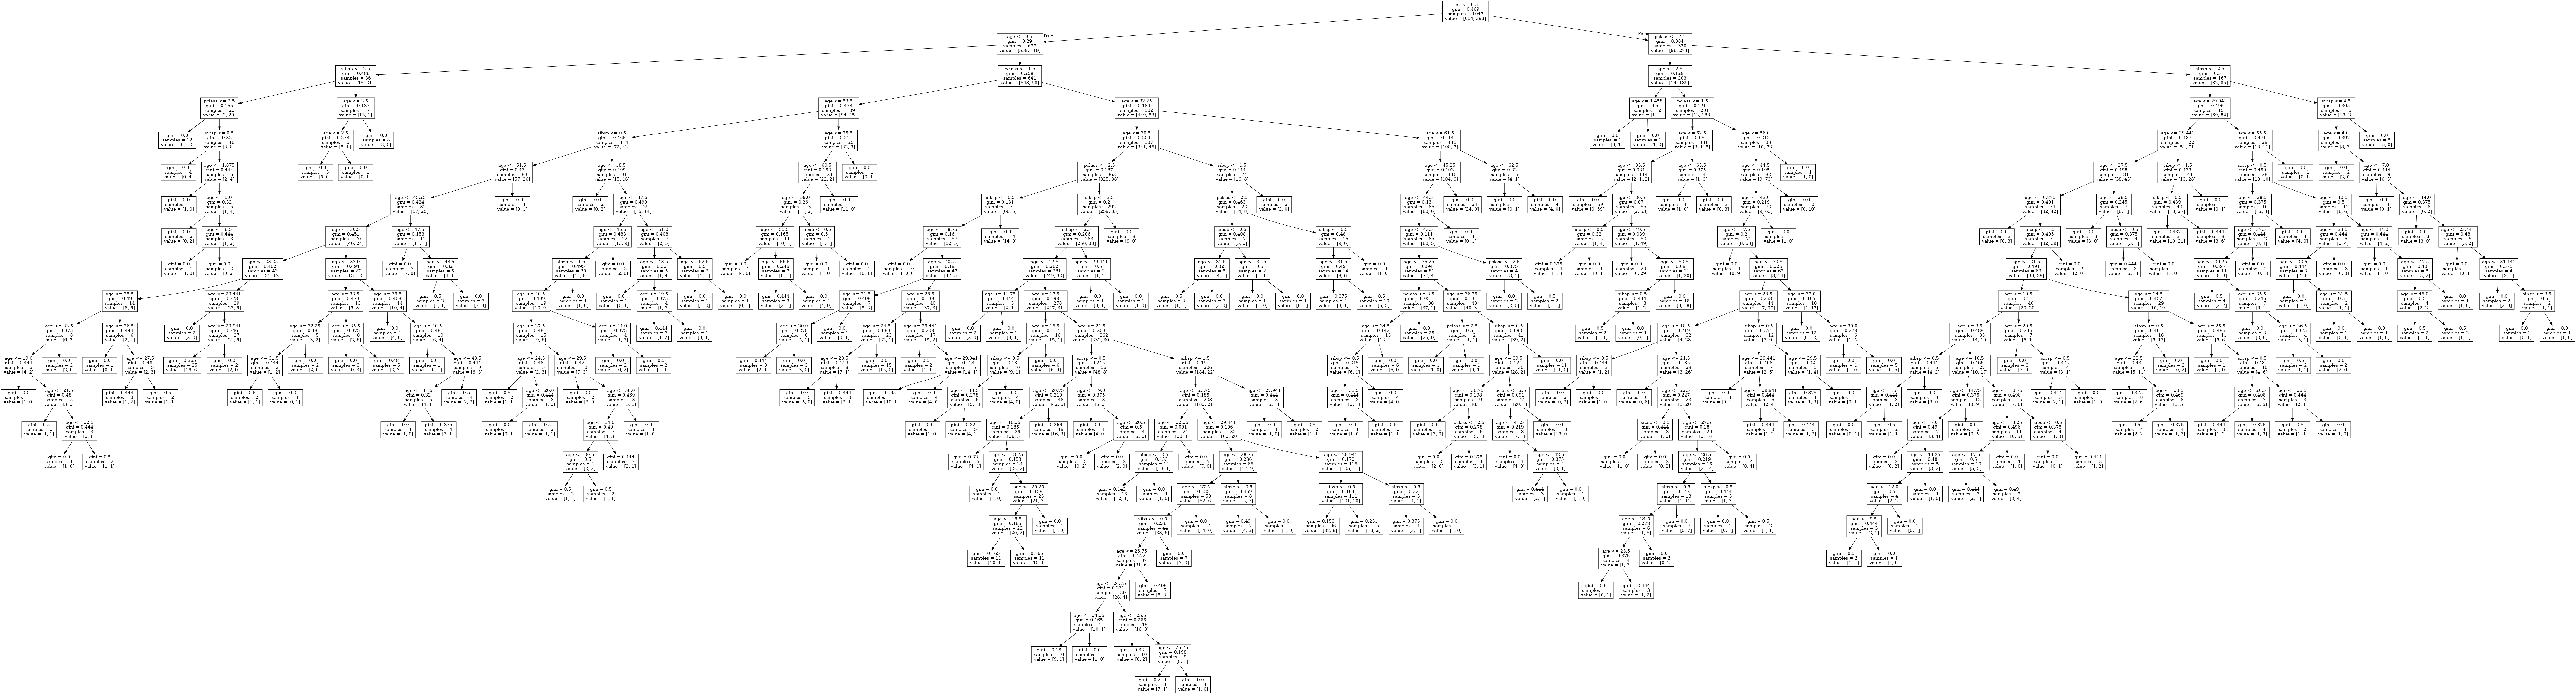

In [507]:
data = export_graphviz(dt, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())


In [508]:
y_pred_new = dt.predict(X_train)

#For training set
conf_matrix = confusion_matrix(y_train, y_pred_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_train = TP/(TP+FN)
specificity_train = TN/(FP+TN)

#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("Test set survivor percentage correctly predicted : {0:.2f}%\n".format(sensitivity_test*100))
print("Test set fatality percentage correctly predicted : {0:.2f}%\n".format(specificity_test*100))

Test set survivor percentage correctly predicted : 57.94%

Test set fatality percentage correctly predicted : 78.06%



In [509]:
#Here we use the GridSearchCV() function to find the best parameter max_leaf_nodes

In [510]:
#Finding best parameters

warnings.filterwarnings("ignore")
tuned_parameters = {
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11],
}

clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=tuned_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Classification Report:")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()



Best parameters set found on development set:

{'max_leaf_nodes': 7}

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       155
           1       0.72      0.64      0.68       107

    accuracy                           0.75       262
   macro avg       0.74      0.74      0.74       262
weighted avg       0.75      0.75      0.75       262




In [511]:
#Here we plot the Decision Tree using the max_leaf_nodes found and a fixed random state.

Accuracy: 75.19%

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       155
           1       0.72      0.64      0.68       107

    accuracy                           0.75       262
   macro avg       0.74      0.74      0.74       262
weighted avg       0.75      0.75      0.75       262



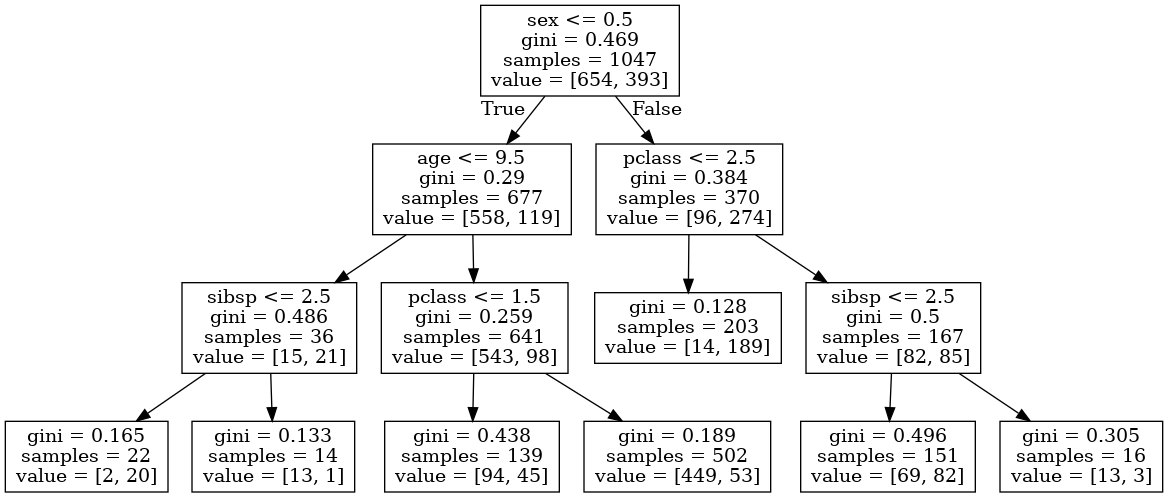

In [512]:
dtc = DecisionTreeClassifier(**clf.best_params_, random_state = 3)
dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

y_true, y_pred = y_test, dtc.predict(X_test)
A = accuracy_score(y_true, y_pred)

print("Accuracy: {0:.2f}%\n".format(A*100))

print(classification_report(y_true, y_pred))

data = export_graphviz(dtc, out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [513]:
#Here we report the accuracy of the pruned tree generated using the Decision Tree Classifier

In [514]:
y_pred_new = dtc.predict(X_train)

#For training set
conf_matrix = confusion_matrix(y_train, y_pred_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_train = TP/(TP+FN)
specificity_train = TN/(FP+TN)

#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("Test set survivor percentage correctly predicted : {0:.2f}%\n".format(sensitivity_test*100))
print("Test set fatality percentage correctly predicted : {0:.2f}%\n".format(specificity_test*100))

Test set survivor percentage correctly predicted : 64.49%

Test set fatality percentage correctly predicted : 82.58%



In [515]:
#Here we plot the pruned tree using the RandomForestClassifier and a fixed random state.

Accuracy: 74.43%

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       155
           1       0.71      0.63      0.67       107

    accuracy                           0.74       262
   macro avg       0.74      0.73      0.73       262
weighted avg       0.74      0.74      0.74       262



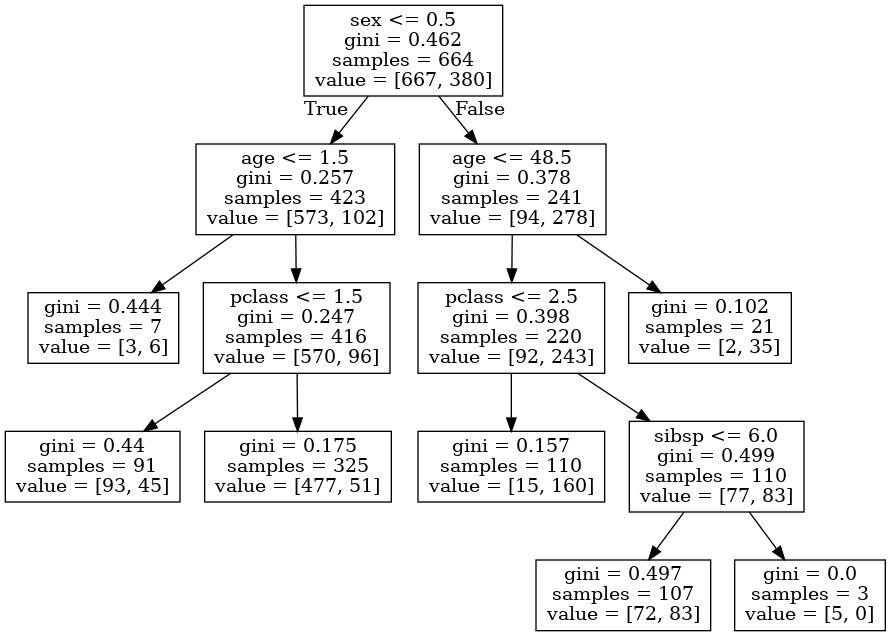

In [516]:
rfc  = RandomForestClassifier(**clf.best_params_,n_estimators = 50, random_state = 3)

rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

y_true, y_pred = y_test, rfc.predict(X_test)
A = accuracy_score(y_true, y_pred)

print("Accuracy: {0:.2f}%\n".format(A*100))

print(classification_report(y_true, y_pred))

data = export_graphviz(rfc.estimators_[1], out_file=None,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [517]:
#Here we report the accuracy of the pruned tree generated using the Random Forest Classifier.

In [518]:
y_pred_new = rfc.predict(X_train)

#For training set
conf_matrix = confusion_matrix(y_train, y_pred_new)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_train = TP/(TP+FN)
specificity_train = TN/(FP+TN)

#for testing set
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)


print("Test set survivor percentage correctly predicted : {0:.2f}%\n".format(sensitivity_test*100))
print("Test set fatality percentage correctly predicted : {0:.2f}%\n".format(specificity_test*100))

Test set survivor percentage correctly predicted : 62.62%

Test set fatality percentage correctly predicted : 82.58%



In [ ]:
#For Random State 0:
#For Decision Tree:
#Accuracy is 81.30%
#For Random Forest:
#Accuracy is 80.15%

#For Random State 1:
#For Decision Tree:
#Accuracy is 78.24%
#For Random Forest:
#Accuracy is 78.63%

#For Random State 2:
#For Decision Tree:
#Accuracy is 79.39%
#For Random Forest:
#Accuracy is 80.92%

#For Random State 3:
#For Decision Tree:
#Accuracy is 75.19%
#For Random Forest:
#Accuracy is 74.43%

#If we compare, the accuracy for the Percentage of Survivors Correctly predicted, then in most of the cases,
#the accuracy of RandomForest is slightly greater than the Decision Tree.

#On the other hand, for the accuracy for the Percentage of Fatalities Correctly predicted, the accuracy of
#Decision Tree is slightly greater than the Random Forest for most cases.

#However when we compare the absolute Accuracy, then both models have a smiliar accuracy and there is no significant,
#improvement in the accuracy for either models.

#But if we compare to an unpruned tree, then the pruned trees using Decision Tree as well as Random Forest,
#have better accuracy than the original unpruned tree.